In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the Walmart dataset
df = pd.read_csv('walmart.csv')

# Step 3: Show the first 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
# Step 4: Explore the dataset

# Get a summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [3]:
# Step 5: Convert 'Date' from object to datetime
#df['Date'] = pd.to_datetime(df['Date'])
# Date is written DD/MM/YYYY while Pandas Parses is MM/DD/YYYY

# Step 5 (fixed): Convert 'Date' properly
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


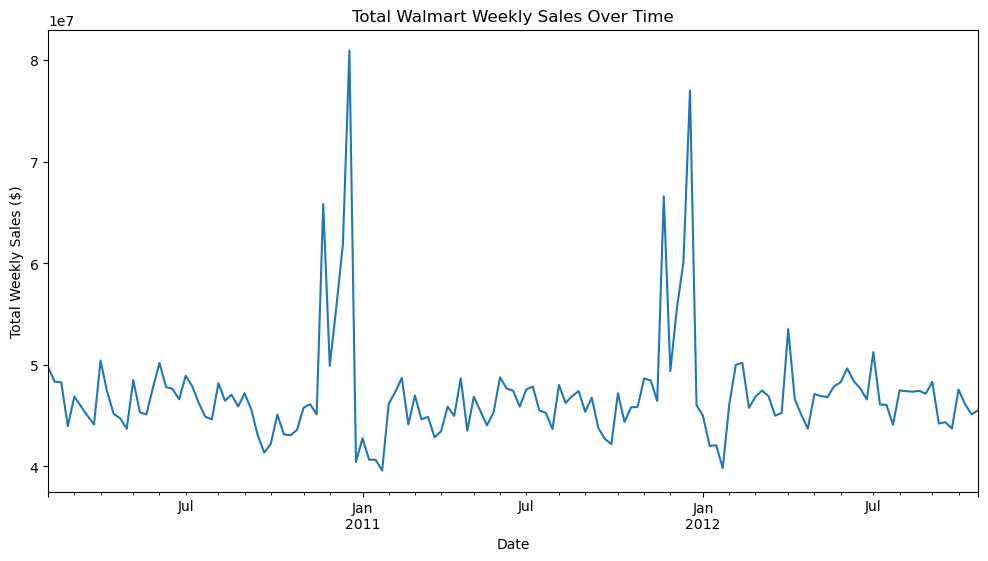

In [4]:
# Step 6: Group weekly sales over time

# Group by 'Date' and sum the 'Weekly_Sales'
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

# Plot
sales_over_time.plot(kind='line', figsize=(12,6), title='Total Walmart Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales ($)')
plt.show()


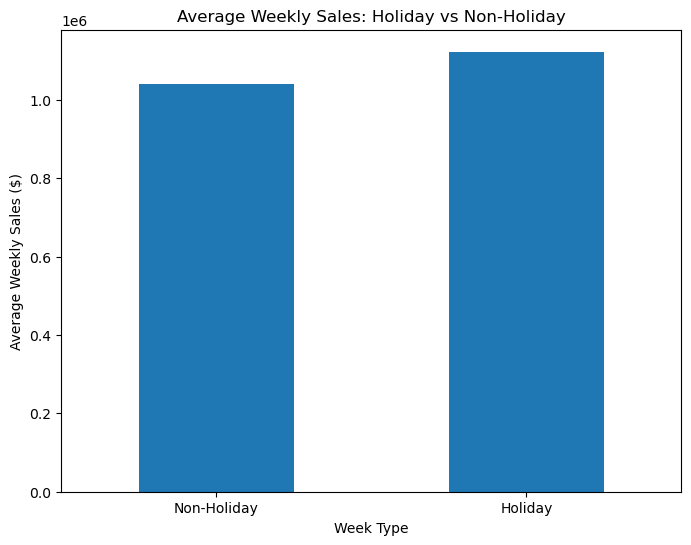

In [5]:
# Step 7a: Compare Holiday vs Non-Holiday Sales

# Group by Holiday_Flag and calculate the average sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot
holiday_sales.plot(kind='bar', title='Average Weekly Sales: Holiday vs Non-Holiday', figsize=(8,6))
plt.xticks(ticks=[0,1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.xlabel('Week Type')
plt.ylabel('Average Weekly Sales ($)')
plt.show()


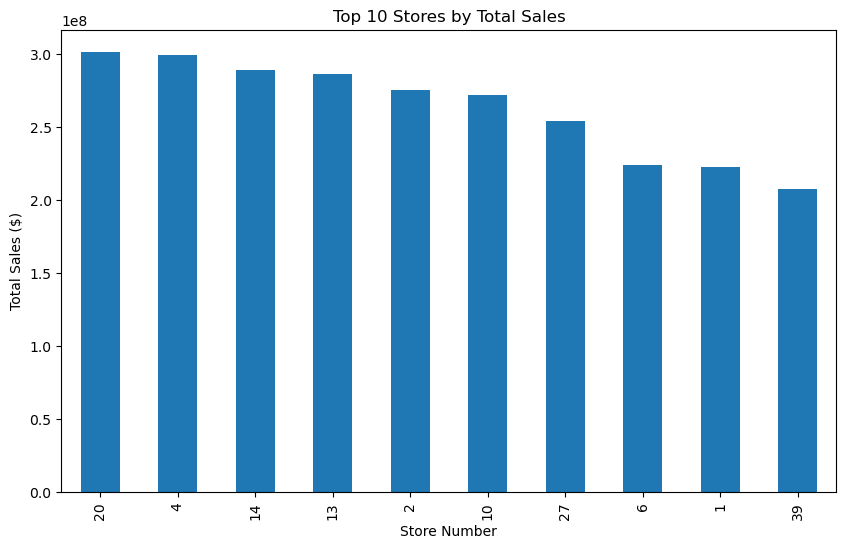

In [6]:
# Step 7b: Compare total sales by Store

# Group by Store and sum the Weekly Sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot Top 10 Stores
store_sales.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Stores by Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')
plt.show()

In [7]:
# Step 8: Save cleaned data
df.to_csv('walmart_sales_cleaned.csv', index=False)